<a href="https://colab.research.google.com/github/LikharJ/TCS-internship/blob/main/TCS_internship_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name-** Juhi Likhar



**B. K. Birla College Kalyan west**


**Branch** - Data science and Big Data Analytics

**ROLL NO** - 10

In [1]:
#LOADING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 10,6
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/LikharJ/TCS-internship/main/trainforecastingdata.csv")
data.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [3]:
data.shape

(913000, 4)

In [4]:
data.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [5]:
items=pd.DataFrame(data.groupby(['item'])['sales'].sum())
items

,sales
item,
1,401384
2,1069564
3,669087
4,401907
5,335230
6,1068281
7,1068777
8,1405108
9,938379


**STORES WISE SALES**

In [6]:
stores=pd.DataFrame(data.groupby(['store'])['sales'].sum())
stores

,sales
store,
1,4315603
2,6120128
3,5435144
4,5012639
5,3631016
6,3627670
7,3320009
8,5856169
9,5025976


EXPLORATORY DATA ANALYSIS ON DATA

**Bivariate**

PRODUCT WISE SALES BARPLOT

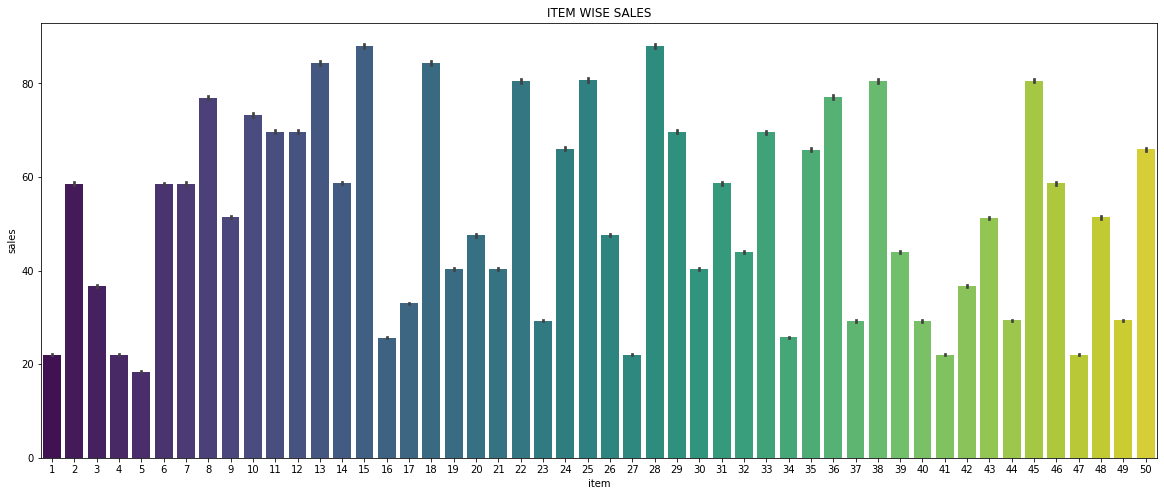

In [7]:
plt.figure(figsize=(20,8))
'''
plt.subplot(1,2,1)
plt.title('ITEM WISE SALES')
sns.boxplot(x=data.item, y=data.sales, palette=("magma"))

plt.subplot(1,2,2)
'''
plt.title('ITEM WISE SALES')
sns.barplot(x=data.item, y=data.sales, palette=("viridis"))

plt.show()

PRODUCT WISE SALES BOXPLOT

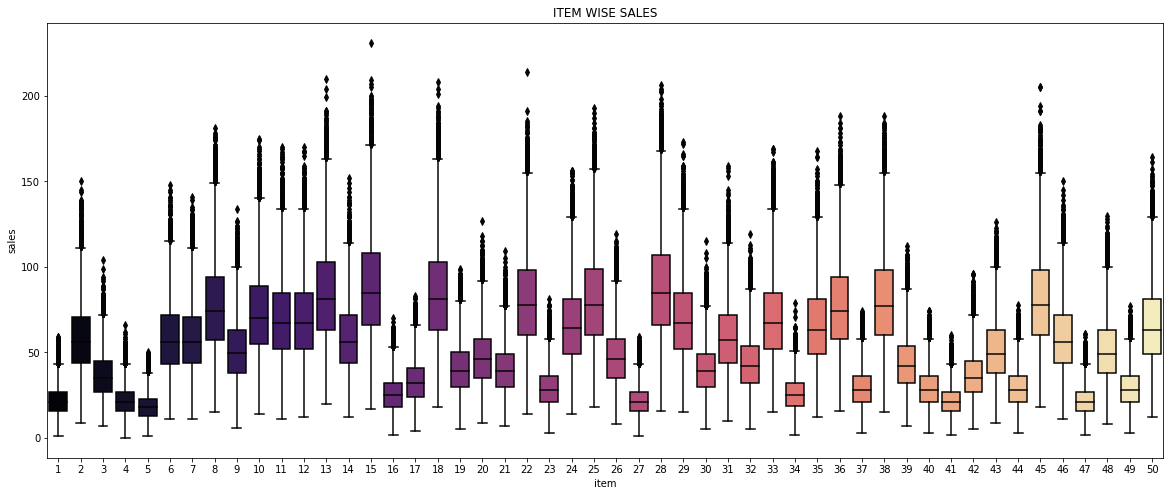

In [8]:
plt.figure(figsize=(20,8))
plt.title('ITEM WISE SALES')
sns.boxplot(x=data.item, y=data.sales, palette=("magma"))
plt.show()

STORE WISE BARPLOT

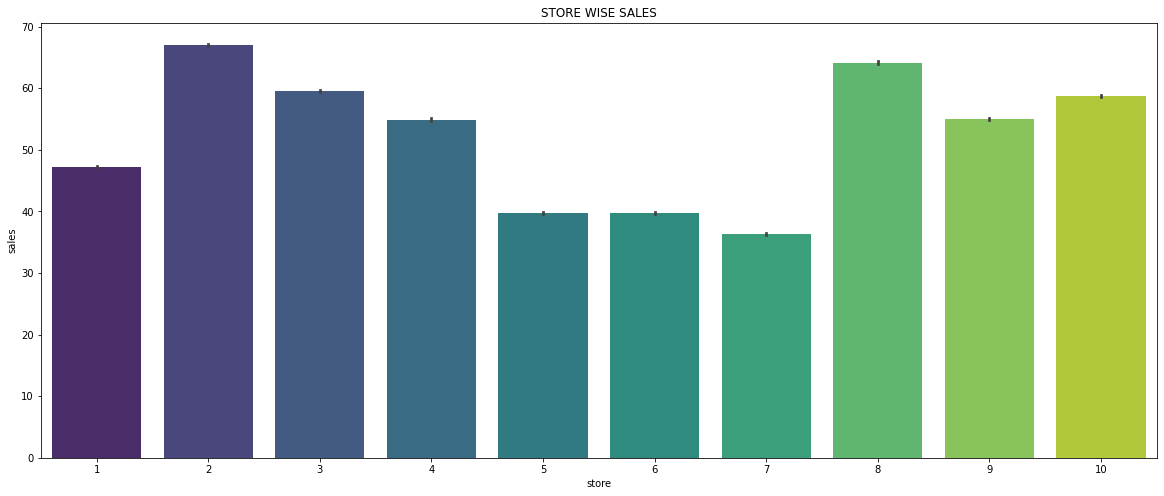

In [9]:
plt.figure(figsize=(20,8))
plt.title('STORE WISE SALES')
sns.barplot(x=data.store, y=data.sales, palette=("viridis"))
plt.show()

STORE WISE BOXPLOT

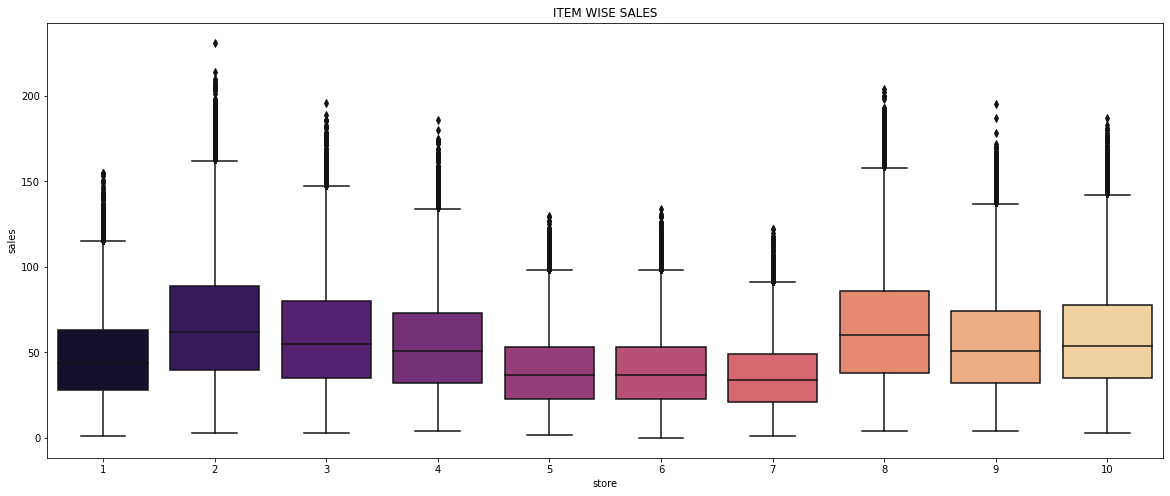

In [10]:
plt.figure(figsize=(20,8))
plt.title('ITEM WISE SALES')
sns.boxplot(x=data.store, y=data.sales, palette=("magma"))
plt.show()

**Preparing data for time series analysis**

In [11]:
df=data[['date','sales']]

In [12]:
print(type(df.loc[101]['date']))
df['date']=pd.to_datetime(df.date)
print(type(df.loc[101]['date']))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [13]:
df.head()

,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10


In [14]:
df.set_index('date', inplace=True)


**RESAMPLING DATA**

In [15]:
df.head()

,sales
date,
2013-01-01,13
2013-01-02,11
2013-01-03,14
2013-01-04,13
2013-01-05,10


In [16]:
df=df.resample('M').sum()
df.head(13)

,sales
date,
2013-01-31,454904
2013-02-28,459417
2013-03-31,617382
2013-04-30,682274
2013-05-31,763242
2013-06-30,795597
2013-07-31,855922
2013-08-31,766761
2013-09-30,689907


**UNIVARIATE ANALYSIS ON SALES**

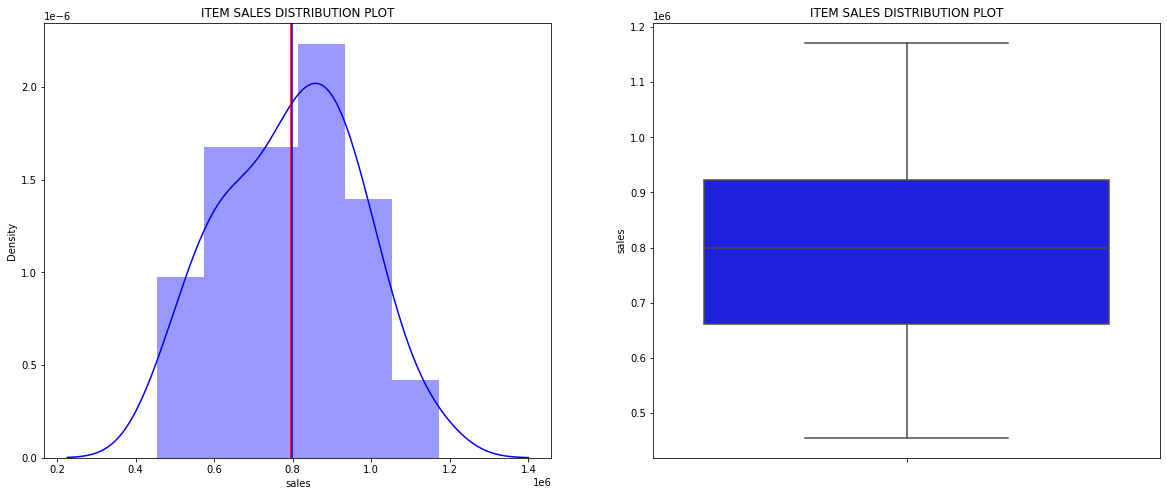

In [17]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('ITEM SALES DISTRIBUTION PLOT')
sns.distplot(df.sales, color='b')
plt.axvline(df.sales.mean(), color="r")
plt.axvline(df.sales.median(), color="b")

plt.subplot(1,2,2)
plt.title('ITEM SALES DISTRIBUTION PLOT')
sns.boxplot(y=df.sales, color='b')

plt.show()

In [18]:
df.sales.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1])

count    6.000000e+01
mean     7.950752e+05
std      1.729018e+05
min      4.549040e+05
25%      6.617050e+05
50%      7.990180e+05
75%      9.220262e+05
85%      9.825794e+05
90%      1.020884e+06
100%     1.171393e+06
max      1.171393e+06
Name: sales, dtype: float64

In [19]:
print('DIFFERNCE BETWEEN MEAN AND MEDIAN :',df.sales.mean()-df.sales.median())

DIFFERNCE BETWEEN MEAN AND MEDIAN : -3942.8000000000466


**CHECKING DATA STATIONARY OR NOT**

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
def stest(s):
    r=adfuller(s)
    l=['ADF test','p-value','#lags used','no. of observations used']
    for v,la in zip(r,l):
        print(la,'->',str(v))
    print()
    if r[1]<=0.05:
        print('data is stationary')
    else:
        print('data is not stationary')

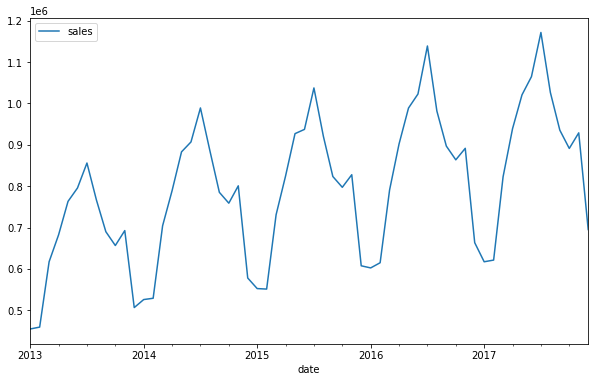

In [22]:
df.plot()

In [23]:
stest(df['sales'])

ADF test -> -5.247518850016353
p-value -> 7.026495391574688e-06
#lags used -> 11
no. of observations used -> 48

data is stationary


**AUTO CORELATION**

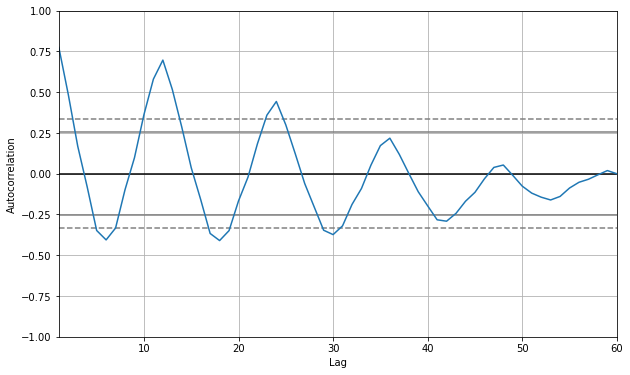

In [24]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['sales'])
plt.show()

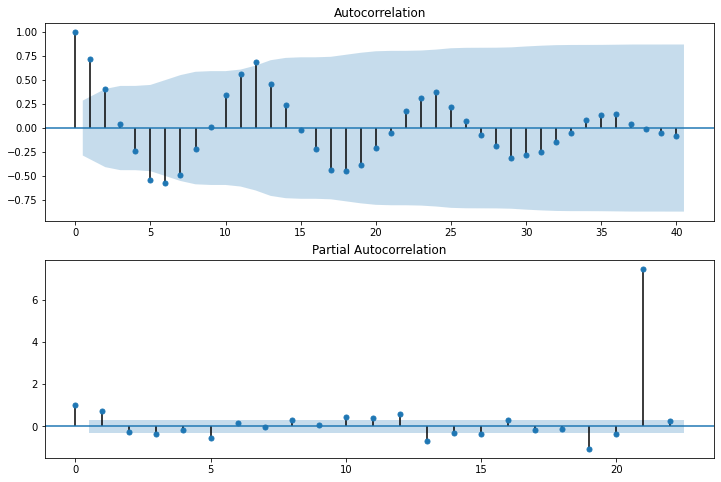

In [25]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['sales'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['sales'].iloc[13:],lags=22,ax=ax2)

**SARIMAX MODEL IMPLEMENTATION**

In [26]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [27]:
ts2=sm.tsa.statespace.SARIMAX(df.sales,order=(1,1,1),seasonal_order=(1,1,1,12), enforce_invertibility=False, enforce_stationarity=False)
model2=ts2.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [28]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              sales   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -623.752
Date:                            Tue, 15 Nov 2022   AIC                           1257.503
Time:                                    15:38:52   BIC                           1264.986
Sample:                                01-31-2013   HQIC                          1260.021
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0119   3.96e-26  -2.56e+25      0.000      -1.012      -1.012
ma.L1          0.8282   4.87e-26    1.7e+25      0.000       0.828       0.828
ar.S.L12      -0.1692   3.96e-27  -4.27e+25      0.000      -0.169      -0.169
ma.S.L12    1.212e+14   5.17e-33   2.34e+46      0.000    1.21e+14    1.21e+14
sigma2      2.836e-13    3.3e-10      0.001      0.999   -6.47e-10    6.48e-10
===================================================================================
Ljung-Box (L1) (Q):                   3.15   Jarque-Bera (JB):                 2.93
Prob(Q):                              0.08   Prob(JB):                         0.23
Heteroskedasticity (H):               0.63   Skew:                            -0.66
Prob(H) (two-sided):                  0.46   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

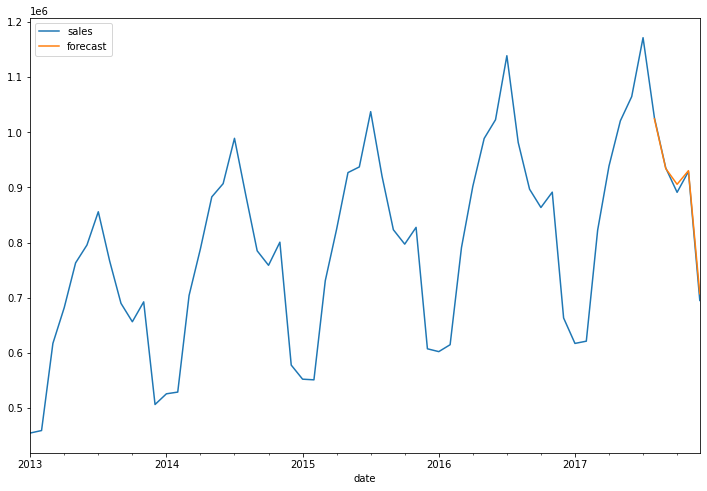

In [29]:
df['forecast']=model2.predict(start=55,end=75,dynamic=True)
df[['sales','forecast']].plot(figsize=(12,8))

**FUTURE FORECAST**

In [30]:
from pandas.tseries.offsets import DateOffset
futuredates=[df.index[-1]+DateOffset(months=x)for x in range(0,24)]

In [31]:
futuredatedf=pd.DataFrame(index=futuredates[1:], columns=df.columns)

In [32]:
futuredatedf.tail()

,sales,forecast
2019-07-31,NaN,NaN
2019-08-31,NaN,NaN
2019-09-30,NaN,NaN
2019-10-31,NaN,NaN
2019-11-30,NaN,NaN


In [33]:
future=pd.concat([df,futuredatedf])

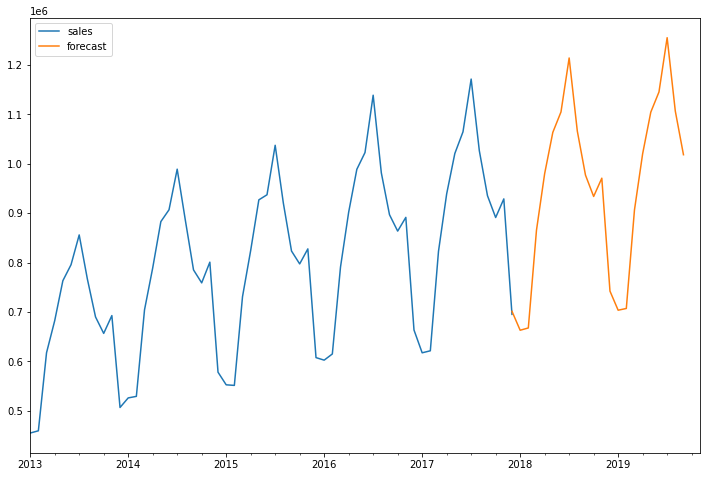

In [34]:
future['forecast']=model2.predict(start=59,end=80,dynamic=True)
future[['sales','forecast']].plot(figsize=(12,8))